<a href="https://colab.research.google.com/github/ramaraghava13/Machine-Learning/blob/main/ML_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

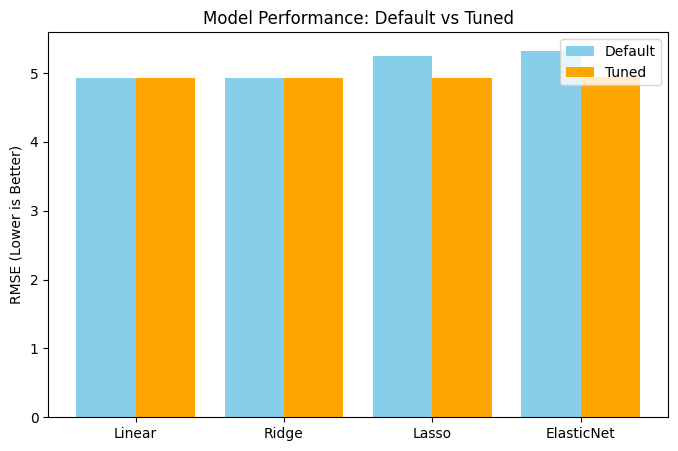

In [10]:
# RMSE Comparison
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Load Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
X, y = boston.data, boston.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models and hyperparameter grids
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(max_iter=10000, random_state=42)
}

param_grids = {
    "Ridge": {"alpha": [0.1, 1, 10, 50]},
    "Lasso": {"alpha": [0.001, 0.01, 0.1, 1]},
    "ElasticNet": {"alpha": [0.01, 0.1, 1], "l1_ratio": [0.2, 0.5, 0.8]}
}

rmse_default = []
rmse_tuned = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_default.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    # Hyperparameter tuning
    if name in param_grids:
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='r2')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred_tuned = best_model.predict(X_test)
        rmse_tuned.append(np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
    else:
        rmse_tuned.append(rmse_default[-1])

# Visualization
x = np.arange(len(models))
plt.figure(figsize=(8,5))
plt.bar(x-0.2, rmse_default, width=0.4, label='Default', color='skyblue')
plt.bar(x+0.2, rmse_tuned, width=0.4, label='Tuned', color='orange')
plt.xticks(x, models.keys())
plt.ylabel("RMSE (Lower is Better)")
plt.title("Model Performance: Default vs Tuned")
plt.legend()
plt.show()


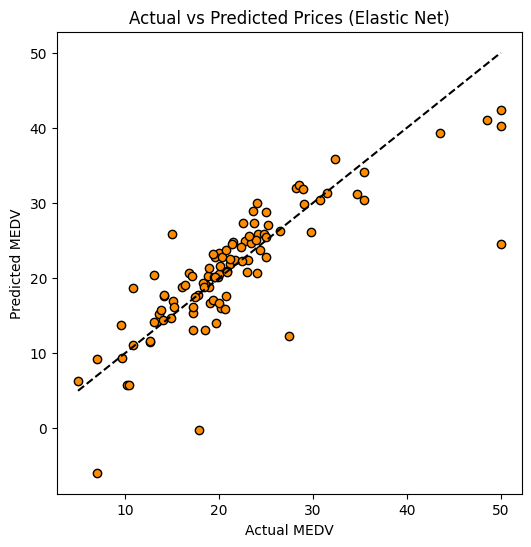

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.2}
RMSE: 4.94
R² Score: 0.67


In [12]:
# Elastic Net Predictions
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Use best hyperparameters for Elastic Net
elastic_net_best = GridSearchCV(
    ElasticNet(max_iter=10000, random_state=42),
    {"alpha": [0.01, 0.1, 1], "l1_ratio": [0.2, 0.5, 0.8]},
    cv=5, scoring='r2'
)
elastic_net_best.fit(X_train, y_train)
y_pred = elastic_net_best.predict(X_test)

# Visualization: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='darkorange', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Prices (Elastic Net)')
plt.show()

# Performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Best Parameters: {elastic_net_best.best_params_}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


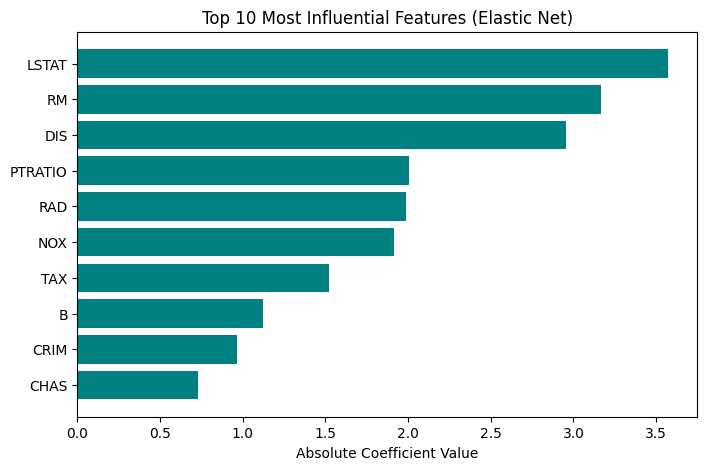

In [13]:
#Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from Elastic Net
feature_names = X.columns
elastic_model = elastic_net_best.best_estimator_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient Magnitude": np.abs(elastic_model.coef_)
}).sort_values(by="Coefficient Magnitude", ascending=False).head(10)

# Visualization
plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient Magnitude'], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Absolute Coefficient Value")
plt.title("Top 10 Most Influential Features (Elastic Net)")
plt.show()
